In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'creditcardfraud:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F310%2F23498%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240501%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240501T154601Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0b236f8a5f55b9d5b0aac24cf1cee052458d689e089ba497a5f290283033f7d404cdf743080d62b279ccd074728c23723d95e26499002dd127787a7a69c9d760be49dd5e15f585dd35a6799d214c3059b9fbb939431f57df33e4bf89036d9a790cf096e2b79161d904d1e080b6d371787d0b9c701def7d2fdd5ae3dbfd41241b7646d9fbcfcab10883a203327dc337341a18e0ab96cb7840862f38ccf8bccfac223bf9d9d271a5d47132158cf103de2f45d4a589ba511ca060fe7f2e3ebb548d006d99cee7ee8396af5e5c667134a4a5dccf1d376f6b94fec223de0fb33b650e2f05a85c683d7f204975049d7bf313d9319d2ddc3e1602d02254e544fc1a4b86'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 69155672 bytes downloaded
Downloaded and uncompressed: creditcardfraud
Data source import complete.


# Credit Card Fraud Detector (CCFD)

## 1. Introduction
The Credit Card Fraud Detection project utilizes machine learning (ML) to detect financial fraud, which is becoming increasingly prevalent in the digital finance era. Fraudulent activities cost institutions billions of dollars annually and have been observed in various sectors, including the financial industry. The project's focus is on developing predictive ML models capable of identifying and predicting fraudulent transactions by analyzing large datasets.

### Abstract

In an era of digital finance, the increased volume of digital transactions has led to many fraudulent activities taking place around the world. With the advent of modern technology and continued economic growth, acts of fraud have become increasingly prevalent, costing institutions billions of dollars annually. Fraudsters are continuously evolving their approaches to exploit the vulnerabilities of the current prevention measures in place, many of whom are targeting the financial sector (Hilal et al). These crimes continue to take place regularly in numerous industries and sectors such as automobile and healthcare insurance fraud, credit card fraud, etc. This scenario highlights the importance of developing new innovative approaches to combat fraudulent activities while safeguarding the integrity of financial transactions.

Machine Learning (ML) offers a promising solution to this problem by leveraging advanced algorithmic models that can learn from, adapt to, and detect fraudulent activities autonomously. These ML models do so by analyzing large datasets of transactional data, financial records, customer behavior, and numerous other features to identify patterns and anomalies in financial data, which can significantly help combat finance crimes. This project aims to leverage various predictive machine learning models that train on big datasets to identify and predict fraudulent financial transactions.

### Problem Statement

Financial fraud is the act of gaining financial benefits by using illegal and fraudulent methods (Ali et al). In the current digital landscape, financial fraud detection requires a strong and robust system that is capable of identifying and reporting fraudulent digital transactions. Traditional methods like manual verifications and validations are often imprecise, costly, and time-consuming. Therefore, the development of advanced fraud detection systems is crucial to ensure the integrity of online transactions, and thus, this project aims to address these challenges by developing a machine learning-based fraud detection system that can efficiently and accurately detect fraudulent transactions across big datasets.

### Dataset
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) accounts for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Goals
In this kernel, I aim to use various predictive models to determine their accuracies used for detecting whether a trasaction is valid or fraudulent. The following evaluation metrics will be used to assess the performance of the developed fraud detection models:
<ol>
    <li>Accuracy: Accuracy will be used to measure the overall effectiveness of the model in classifying transactions correctly. Although a useful starting point, accuracy would not be the sole metric to determine performance due to the imbalanced nature of the dataset, where fraudulent transactions are significantly lower than legitimate ones.</li>
    <li>Precision, Recall (Sensitivity), and F1-Score: These metrics will help balance the tradeoff between false positives and false negatives. This is important in the context of financial fraud detection because missing a fraudulent transaction (false negative) can be costly (as fraudulent transaction data is scarce), and wrongly flagging a legitimate transaction (false positive) can affect the accuracy.</li>
    <li>Area Under the ROC Curve (AUC-ROC): The metric will provide an aggregate measure of the performance of the model’s ability to accurately distinguish between fraudulent and legitimate transactions across various threshold settings, providing insight into the model's overall discriminative power.</li>
</ol>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

## 2. Understand Our Data

In [4]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# Check for any missing values in the dataframe
null_series = pd.isnull(df)
missing_values_count = null_series.sum()
print("Count of missing values in the dataframe:\n", missing_values_count, "\n\n\n")
null_series

Count of missing values in the dataframe:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64 





,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.describe()     # describe the dataset such as mean, standard deviation, min, max, etc.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.columns     # print a list of all the columns for reference (many feature names are hidden due to confidentiality issues)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# Identify fraudulent and non-fraudulent transactions in the dataset as indicated by the "Class" column

# Print class total counts
fraudulent_transactions = df.Class.value_counts()[1]
print("Number of fraudulent transactions =", fraudulent_transactions)

nonfraudulent_transactions = df.Class.value_counts()[0]
print("Number of non-fraudulent transactions =", nonfraudulent_transactions)

# Print class percentages
percent_fraud = round((df.Class.value_counts()[1] / len(df)) * 100, 2)
print("Fraudulent:", percent_fraud, "%")

percent_nonfraud = round((df.Class.value_counts()[0] / len(df)) * 100, 2)
print("Non-fraudulent:", percent_nonfraud, "%")

Number of fraudulent transactions = 492
Number of non-fraudulent transactions = 284315
Fraudulent: 0.17 %
Non-fraudulent: 99.83 %


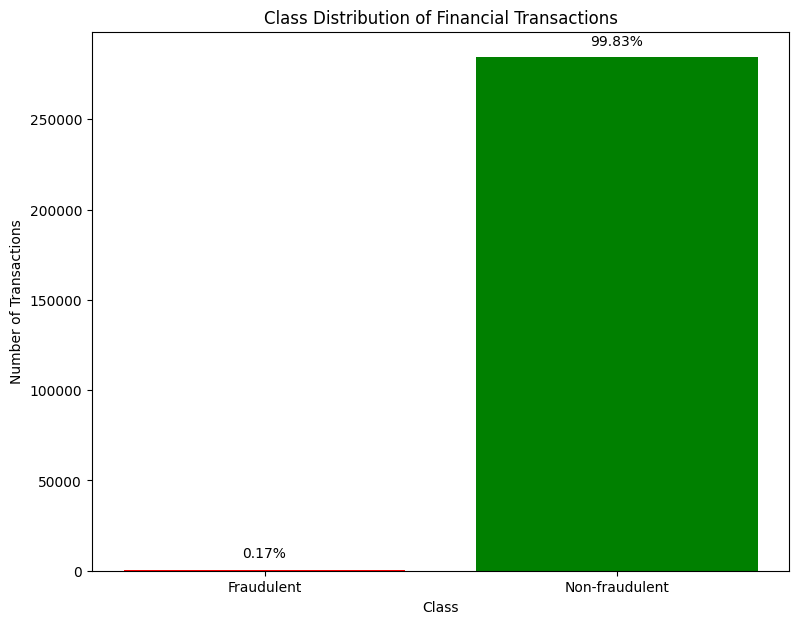

In [9]:
# Display the imbalance in the dataset using a barchart
categories = ["Fraudulent", "Non-fraudulent"]
counts = [fraudulent_transactions, nonfraudulent_transactions]
percentages = [percent_fraud, percent_nonfraud]

plt.figure(figsize=(9, 7))                                     # create bar plot
bars = plt.bar(categories, counts, color=['red', 'green'])     # create bars with different colors
plt.title('Class Distribution of Financial Transactions')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')

# Show percentages above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, f'{percentages[bars.index(bar)]}%', ha='center', va='bottom')

plt.show()

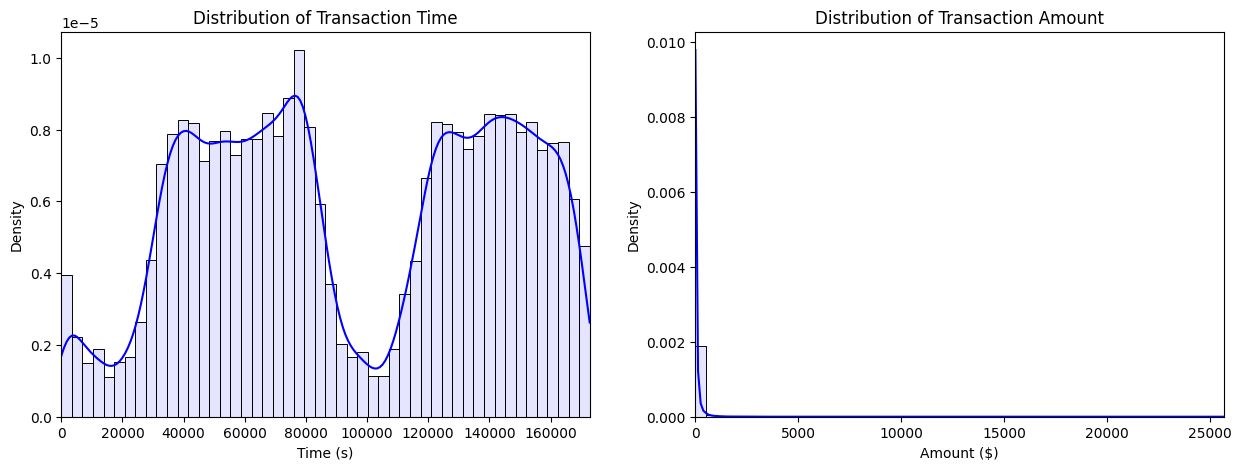

In [10]:
# display the distributions of both the "time" and "amount" columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

time = df.Time.values
amount = df.Amount.values

# Distribution of transaction time
sns.histplot(time, bins=50, ax=ax[0], kde=True, stat="density", alpha=.1, color='b')
ax[0].set_title('Distribution of Transaction Time')
ax[0].set(xlabel='Time (s)')
ax[0].set_xlim([min(time), max(time)])

# Distribution of transaction amount
sns.histplot(amount, bins=50, ax=ax[1], kde=True, stat="density", alpha=.1, color='b')
ax[1].set_title('Distribution of Transaction Amount')
ax[1].set(xlabel='Amount ($)')
ax[1].set_xlim([min(amount), max(amount)])

plt.show()

### Summary
This section allows us to gather a basic sense of our data. We know that besides transaction and amount, all the other columns (features) are hidden dur to privacy reasons in our original dataframe; however, we know that those columns have already been scaled. Our code sets up the initial stages of analysis by loading the dataset, checking for missing values, and confirming that there are none. It prints out the number of fraudulent and non-fraudulent transactions, revealing the massive disproportion between them (99.83% of transactions are non-fraudulent while 0.17% are fraudulent). From the description of the dataset, we can see that most transactions are really small with the mean being around 88 USD.

Finally, we generate histograms for the distribution of the 'Time' and 'Amount' features, overlaid with kernel density estimation (KDE) curves. The histograms illustrate the distributions of the 'Time' and 'Amount' variables in the dataset. 'Time' likely shows some patterns or cycles corresponding to transaction frequency over the two days of recorded data, while 'Amount' displays a right-skewed distribution, common in financial transaction data, where lower amounts are more frequent than higher ones. This stage of exploratory data analysis is crucial for understanding the data's structure and for designing appropriate data preprocessing and ML modeling strategies, given the class imbalance and the transformed nature of most of the features due to PCA.

## 3. Normalizing the Data
In this section, we will first normalize our dataframe by scaling the <b>Time</b> and <b>Amount</b> columns similar to other columns. This ensures that no single feature dominates the distance calculations in an algorithm and can help to improve the performance of the algorithms.

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
#robust_scaler = RobustScaler()

df['Scaled Time'] = std_scaler.fit_transform(df.Time.values.reshape(-1, 1))
df['Scaled Amount'] = std_scaler.fit_transform(df.Amount.values.reshape(-1, 1))

new_df = df.copy()
df.drop(['Time','Amount'], axis=1, inplace=True)
scaled_time = df['Scaled Time']
scaled_amount = df['Scaled Amount']
df.drop(['Scaled Time', 'Scaled Amount'], axis=1, inplace=True)
df.insert(0, 'Scaled Time', scaled_time)
df.insert(1, 'Scaled Amount', scaled_amount)

df

,Scaled Time,Scaled Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-0.350151,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,1.641952,-0.254117,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.641974,-0.081839,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,1.641974,-0.313249,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


## 4. Splitting the Data
Next, we need to split our data into train and test categories to efficiently train our models on given data and test on unseen hidden data. Therefore, we create a sub-sample of the dataframe with an equal amount of fraud and non-fraud transactions, which helps our models to better understand the pattern in our data. This 50/50 ratio sub-sampling will be done by randomly selecting a certain amount of samples from both the fraud and non-fraud classes using random undersampling.

Our models need to address two important concerns - overfitting and wrong correlations. Considering the disproportionate ratio between frauds and non-frauds where the non-fraud class makes up the majority of the dataset, our classification models need to correctly predict when a fraudulent transaction occurs, although our models will mostly assume of the default value of 0 (non-fraud). Also, given that most of the features are hidden to due to privacy concerns, we still need to correctly identify and predict which of these features significantly influence the result of fraudulent and non-fraudulent transactions.

Here, we aim to train our models on the split dataset, fit them with the randomly undersampled or oversampled data, and test on the original testing set.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# Shuffle the dataset
df = df.sample(frac=1, random_state=1)

# Original X and y
X = df.drop('Class', axis=1)
y = df['Class']

# Step 1: Use StratifiedShuffleSplit to split into train and test sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Printing the number of transactions in the original train and test sets
print("Number of transactions in the original train and test datasets:")
print("---------------------------------------------------------------")
print("Number of transactions in train dataset: ", len(X_train))
print("Number of transactions in test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train) + len(X_test))

original_Xtrain = X_train.values
original_Xtest = X_test.values
original_ytrain = y_train.values
original_ytest = y_test.values

# Applying Random UnderSampling on the original training set
fraud_indices = np.array(df[df['Class'] == 1].index)
non_fraud_indices = df[df['Class'] == 0].index

# Randomly select non-fraud indices to match the number of fraud transactions
random_non_fraud_indices = np.random.choice(non_fraud_indices, len(fraud_indices), replace=False)

# Combine fraud indices with the random non-fraud indices
under_sample_indices = np.concatenate([fraud_indices, random_non_fraud_indices])

# Under sample dataset
under_sample_data = df.loc[under_sample_indices]

# Splitting the undersampled dataset into training and testing set
X_undersample = under_sample_data.drop('Class', axis=1)
y_undersample = under_sample_data['Class']

X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(
    X_undersample, y_undersample, test_size=0.3, random_state=1
)

# Printing the number of transactions in the undersampled train and test sets
print("\n\nNumber of transactions in the undersampled train and test datasets:")
print("-------------------------------------------------------------------")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample) + len(X_test_undersample))

print("\n\n\nNumber of normal transactions: ", len(y_undersample[y_undersample == 0]))
print("Number of fraud transactions: ", len(y_undersample[y_undersample == 1]))

# Printing the percentage distribution of the undersampled dataset
print("\n\nPercentage of normal transactions: ", len(y_undersample[y_undersample == 0]) / len(y_undersample))
print("Percentage of fraud transactions: ", len(y_undersample[y_undersample == 1]) / len(y_undersample))
print("Total number of transactions in resampled data: ", len(y_undersample))

Number of transactions in the original train and test datasets:
---------------------------------------------------------------
Number of transactions in train dataset:  227845
Number of transactions in test dataset:  56962
Total number of transactions:  284807


Number of transactions in the undersampled train and test datasets:
-------------------------------------------------------------------
Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984



Number of normal transactions:  492
Number of fraud transactions:  492


Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984



Distribution of the Classes in the subsample dataset
Class
1    0.5
0    0.5
Name: proportion, dtype: float64


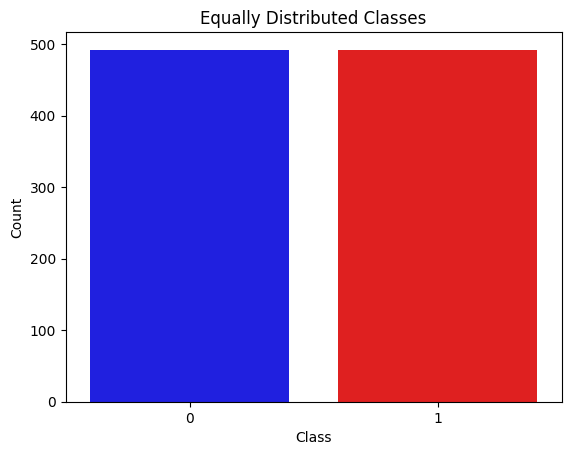

In [13]:
# Distribution in the subsample dataset
distribution = y_undersample.value_counts(normalize=True)
print("\nDistribution of the Classes in the subsample dataset")
print(distribution)

# Plotting the distribution of the Classes in the subsample dataset
sns.countplot(x=y_undersample, palette=['blue', 'red'])
plt.title('Equally Distributed Classes')
plt.ylabel('Count')
plt.xlabel('Class')

# Show the plot
plt.show()

### Summary
Recognizing the importance of handling the imbalanced nature of my dataset, which contains a small fraction of fraudulent transactions compared to legitimate ones, I have implemented a random undersampling strategy. This strategy is designed to provide a 50/50 split of fraud and non-fraud transactions in the subsample dataset, allowing my models to learn to discern patterns of fraud more effectively without being biased towards the majority class.

I first shuffled the dataset to ensure randomness and then used the StratifiedShuffleSplit from scikit-learn to create a stratified split for my training and testing sets. This ensures that the proportion of fraud to non-fraud transactions is consistent across both sets. After splitting, I confirmed that the number of transactions in my train and test datasets matched the total number of transactions, assuring a complete division of the original data. I then performed random undersampling on the training set to create a balanced subsample. This balanced approach prevents the model from simply assuming the majority class for all predictions, which is critical given that my goal is to identify fraudulent transactions accurately.

My results clearly showed an equal distribution of fraud and non-fraud transactions in the subsampled training and testing sets, which I verified by printing out the counts and checking the percentage distribution. I further visualized this distribution using a seaborn countplot, ensuring that my dataset is now ready for training without the initial bias. By taking these steps, I've laid the groundwork to train my machine learning models on data that reflect an equal representation of both classes, which is a crucial factor in the performance and reliability of fraud detection systems.

## 5. Focal Loss using Undersampled Data

Focal Loss is a loss function where the instances of fraudulent transactions are very few compared to the non-fraudulent ones, traditional loss functions like cross-entropy may not perform well. This is because they treat all misclassifications equally, regardless of the rarity of the class. Focal Loss addresses this by down-weighting the loss assigned to well-classified examples, focusing more on hard, misclassified examples. It introduces a modulating factor that reduces the loss contribution from easy examples, which are already correctly classified with high confidence. This way, it concentrates more on the difficult examples that are misclassified or are on the decision boundary.

In randomly undersampled datasets, instances from the majority class are randomly removed to balance the class distribution. Focal Loss can help in addressing the information loss caused by undersampling. By focusing on hard-to-classify examples, it ensures that the model pays more attention to the remaining instances of the minority class. This can lead to better performance compared to traditional loss functions, which might not effectively handle the class imbalance.

In [ ]:
!pip install tensorflow

  Using cached keras-3.3.2-py3-none-any.whl.metadata (5.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.9 MB/s eta 0:00:00:00:0100:01
Using cached keras-3.3.2-py3-none-any.whl (1.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Focal loss for binary classification problems
def focal_loss(gamma=2., alpha=4.):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        fl = - tf.math.log(p_t) * tf.pow((1 - p_t), gamma) * alpha_t
        return tf.reduce_mean(fl)
    return focal_loss_fixed

# Build a simple neural network model
# Parameters for the model
n_inputs = X_train_undersample.shape[1]

# Define the model
model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss=focal_loss(gamma=2, alpha=0.25), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1955 (7.64 KB)
Trainable params: 1955 (7.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_undersample, y_train_undersample, epochs=25, batch_size=32, validation_data=(X_test_undersample, y_test_undersample))     # Train the model

Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7757 - loss: 0.0846 - val_accuracy: 0.8514 - val_loss: 0.0397
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8718 - loss: 0.0373 - val_accuracy: 0.8818 - val_loss: 0.0303
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9160 - loss: 0.0255 - val_accuracy: 0.8885 - val_loss: 0.0261
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9235 - loss: 0.0230 - val_accuracy: 0.8919 - val_loss: 0.0240
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9154 - loss: 0.0215 - val_accuracy: 0.8953 - val_loss: 0.0221
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9253 - loss: 0.0174 - val_accuracy: 0.8986 - val_loss: 0.0210
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9393 - loss: 0.0150 - val_accuracy: 0.8986 - val_loss: 0.0198
Epoch 8/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9159 - loss: 0.0170 - val_accuracy: 0.9122 - val_loss

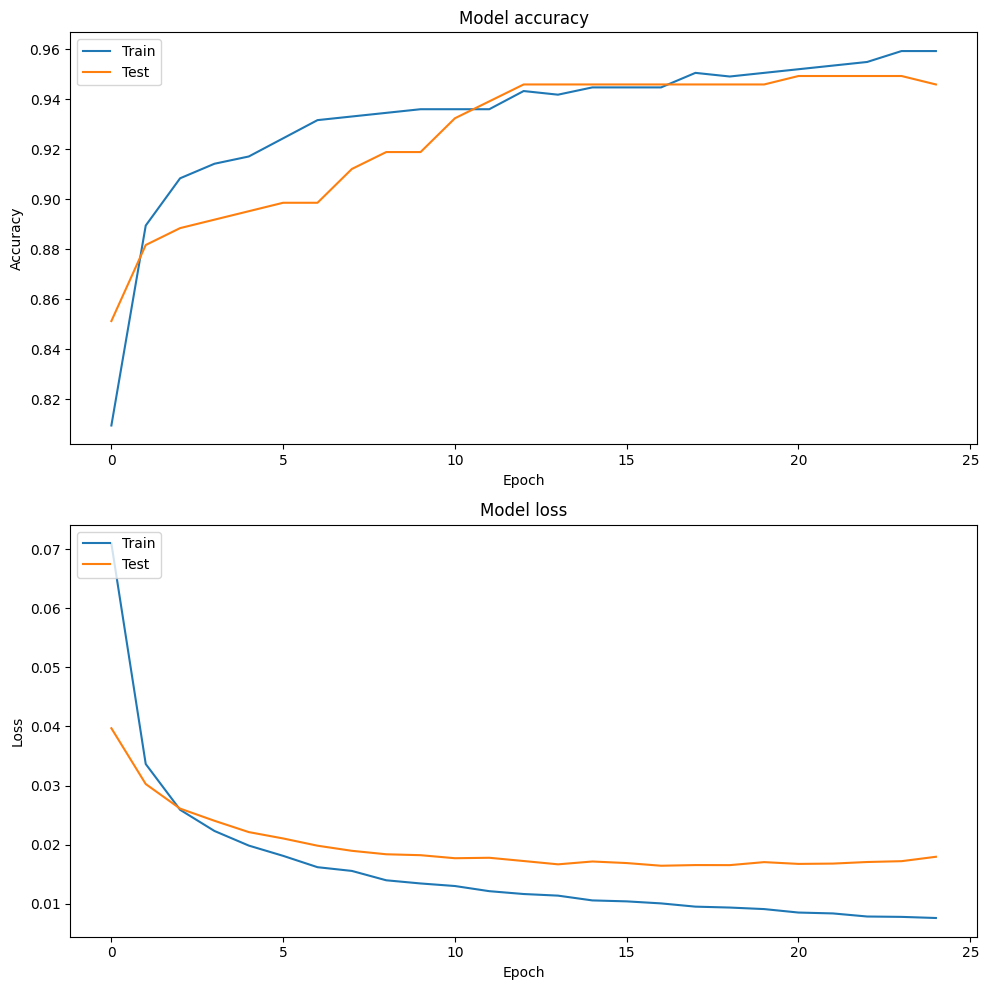

In [ ]:
# Plotting the accuracy and loss curves
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the original test
# data and obtain the class predictions
predictions = model.predict(original_Xtest, batch_size=200, verbose=1)

285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Convert probabilities to class labels and flatten them (convert a multi-dimensional array into a 1D array)
undersample_fraud_predictions = (predictions > 0.5).astype(int)
undersample_fraud_predictions = undersample_fraud_predictions.flatten()

print(len(undersample_fraud_predictions))

undersample_fraud_predictions[:1000]

56962


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Summary

In this section, we trained a Neural Network to calculate the focal loss on undersampled data. The accuracy and loss graphs show the model's performance over 25 epochs of training. From the accuracy graph, we can observe that the model's accuracy on the training set starts higher than 75% and quickly improves, reaching above 95% by the end of the training. This rapid gain demonstrates the model's capability to learn discriminative features from the undersampled dataset effectively. The test accuracy, which is the model's performance on unseen data, also shows significant improvement and closely follows the training accuracy. This close correspondence suggests that the model generalizes well and is not overfitting to the training data. The final validation accuracy of about 94.59% indicates a robust model that is able to recognize patterns indicative of fraudulent transactions.

The loss graph presents a similarly positive picture. The model starts with a higher loss on the training data, which sharply decreases and then plateaus as the epochs progress, indicating that the model is learning and minimizing the focal loss effectively. The validation loss decreases alongside the training loss and stays consistently close throughout the training process. This shows that the model is not just memorizing the training data but is able to generalize its predictions to new, unseen data.

Overall, the results are quite significant. High accuracy and low loss on both the training and validation sets indicate that the model, equipped with focal loss, is performing well. The graphs show that the model quickly reaches a high level of accuracy and then continues to fine-tune its parameters to improve performance incrementally.

## 6. Classification Using Undersampled Data

In this section, we will train 4 major classifiers using undersampled data - Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Decision Trees. We will then determine which classifer is more effective in identifying fraudulent transactions. We will start by first importing all the necessary libraries for the 4 classifers, defining/initializing them, and providing training accuracies for each classifier on the undersampled training dataset.

We will also later use 2 major types of cross-validation techniques to search for the most optimal set of hyperparameters for each model - RandomizedSearchCV and GridSearchCV. Cross-validation is a statistical technique used in machine learning and model evaluation to assess how well a predictive model generalizes to an independent dataset. The basic idea is to partition the dataset into subsets, train the model on some of these subsets (training set), and then validate it on the remaining subset (validation set). This process is repeated multiple times, with different subsets used for training and validation each time. Cross-validation helps in detecting and preventing overfitting by evaluating the model's performance on multiple validation sets.

<b>GridSearchCV</b>

In GridSearchCV, we specify a grid of hyperparameter values that we want to search over. For each combination of hyperparameters in the grid, the model is trained and evaluated using cross-validation. GridSearchCV exhaustively searches through all possible combinations of hyperparameters, which can be computationally expensive, especially for models with a large number of hyperparameters or a large search space. While GridSearchCV guarantees that the best hyperparameters within the specified grid will be found, it may not be efficient in terms of time and computational resources.

<b>RandomizedSearchCV</b>

RandomizedSearchCV, on the other hand, randomly samples hyperparameter values from a predefined distribution. Instead of trying all possible combinations, it selects a random subset of the hyperparameter space and evaluates the model on these random samples. RandomizedSearchCV is more efficient than GridSearchCV, especially when the hyperparameter search space is large. It allows for a broader exploration of the hyperparameter space within a limited computational budget. While RandomizedSearchCV may not guarantee finding the absolute best hyperparameters, it often finds good hyperparameter configurations in a shorter amount of time compared to GridSearchCV.

In this section, we will use both hyperparameter optimization techniques and compare/contrast their output values on our dataset.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),     # Increase the maximum number of iterations
    "KNearest": KNeighborsClassifier(n_neighbors=5),             # Use default parameter
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Convert to values for feeding the classification algorithms
X_train = X_train_undersample.values
y_train = y_train_undersample.values

# Cross validate and print the scores
print("\nAccuracy Scores for Various Classifiers:")
print("----------------------------------------")

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"Classifier: {classifier.__class__.__name__} has a training score of {round(training_score.mean(), 2) * 100:.0f}% accuracy.")


Accuracy Scores for Various Classifiers:
----------------------------------------
Classifier: LogisticRegression has a training score of 93% accuracy.
Classifier: KNeighborsClassifier has a training score of 92% accuracy.
Classifier: SVC has a training score of 93% accuracy.
Classifier: DecisionTreeClassifier has a training score of 90% accuracy.


In [16]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for each classifier
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knears_params = {"n_neighbors": list(range(2,11,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), "min_samples_leaf": list(range(1,10,1))}

# Set up RandomizedSearchCV for each classifier
log_reg_rscv = RandomizedSearchCV(LogisticRegression(max_iter=1000), log_reg_params, n_iter=100)
knears_rscv = RandomizedSearchCV(KNeighborsClassifier(), knears_params, n_iter=100)
svc_rscv = RandomizedSearchCV(SVC(), svc_params, n_iter=100)
tree_rscv = RandomizedSearchCV(DecisionTreeClassifier(), tree_params, n_iter=100)

# Fit the RandomizedSearchCV objects
print("Performing RandomizedSearchCV for different classifiers...")
log_reg_rscv.fit(X_train, y_train)
knears_rscv.fit(X_train, y_train)
svc_rscv.fit(X_train, y_train)
tree_rscv.fit(X_train, y_train)

# Best estimators after RandomizedSearchCV
log_reg = log_reg_rscv.best_estimator_
knears_neighbors = knears_rscv.best_estimator_
svc = svc_rscv.best_estimator_
tree_clf = tree_rscv.best_estimator_

# Print the cross-validation scores
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score:', round(log_reg_score.mean(), 2))

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('K-Nearest Neighbors Cross Validation Score:', round(knears_score.mean(), 2))

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score:', round(svc_score.mean(), 2))

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score:', round(tree_score.mean(), 2))

Performing RandomizedSearchCV for different classifiers...
Logistic Regression Cross Validation Score: 0.94
K-Nearest Neighbors Cross Validation Score: 0.93
Support Vector Classifier Cross Validation Score: 0.93
DecisionTree Classifier Cross Validation Score: 0.92


In [17]:
# Using GridSearchCV to find the best parameters:
from sklearn.model_selection import GridSearchCV

best_models_grid = {}

grid_params = {
    "LogisticRegression": {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "KNearest": {"n_neighbors": list(range(2,11,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    "Support Vector Classifier": {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
    "DecisionTreeClassifier": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), "min_samples_leaf": list(range(1,10,1))}
}

# Execute GridSearchCV for each classifier
for name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, grid_params[name])
    grid_search.fit(X_train, y_train)
    best_models_grid[name] = grid_search.best_estimator_

# Print the training accuracies for the best models from GridSearchCV
print("\nTraining Accuracies from GridSearchCV:")
for name, model in best_models_grid.items():
    score = cross_val_score(model, X_train, y_train, cv=5).mean()
    print(f"{name} Cross Validation Score: {score:.2f}")


Training Accuracies from GridSearchCV:
LogisticRegression Cross Validation Score: 0.94
KNearest Cross Validation Score: 0.93
Support Vector Classifier Cross Validation Score: 0.93
DecisionTreeClassifier Cross Validation Score: 0.92


### Summary

In my analysis, I trained the four major classifiers using the undersampled data. My objective was to identify the most effective classifier in detecting fraudulent transactions. I began by importing the necessary libraries and initializing each classifier with default or specified parameters. After training each classifier on the undersampled dataset, I assessed their performance using cross-validation. The initial results showed that Logistic Regression is more accurate than the other three classifiers with KNN and SVC being close runner-ups. Decision Tree has the lowest cross-validation score of out of all. Logistic Regression Classifier shows the best score in both training and cross-validating sets.

To optimize these classifiers, I employed two hyperparameter tuning techniques: RandomizedSearchCV and GridSearchCV. With RandomizedSearchCV, I defined a wide range of parameter options for each model and performed randomized searches to find the best combination of parameters. I fit each classifier with the training data and printed out their cross-validation scores. Subsequently, I used GridSearchCV, which exhaustively considers all parameter combinations to ensure the best possible model. After executing GridSearchCV for each classifier, I stored the best estimators and calculated the cross-validation scores for these optimized models. We can conclude that both hyperparameter optimization techniques are effective and provide almost identical cross-validation scores, and therefore, we can use either technique although RandomizedSearchCV is comparatively faster over large search spaces. Through this meticulous process, I ensured that my classifiers were tuned to their best parameters to yield the most accurate predictions.

## 7. Area Under the ROC Curve (AUC-ROC):
The AUC-ROC curve is a performance measurement for classification problems at various threshold settings. ROC stands for "Receiver Operating Characteristic" and AUC for "Area Under the Curve." The curve plots the True Positive Rate (TPR, also called recall) against the False Positive Rate (FPR) at different classification thresholds. The AUC-ROC measures the model's ability to distinguish between fraudulent and legitimate transactions.

<ol>
    <li>True Positive Rate (TPR) is a measure of how many actual positives a model correctly identifies (i.e., the percentage of fraud cases correctly identified).</li>
    <li>False Positive Rate (FPR) is a measure of how many actual negatives are incorrectly identified as positives (i.e., the percentage of non-fraud cases incorrectly identified as fraud).</li>
</ol>

In layman's terms:
<ul>
    <li>Higher TPR: A higher TPR means a higher proportion of actual fraud cases are correctly being identified by the model.</li>
    <li>Lower FPR: A lower FPR means a lower proportion of non-fraud cases are being mistakenly flagged as fraud.</li>
</ul>

Important Terms:
<ul>
    <li><b>True Positives:</b> correctly classified fraudulent transactions</li>
    <li><b>False Positives:</b> incorrectly Classified fraudulent transactions</li>
    <li><b>True Negatives:</b> correctly Classified non-fraud transactions</li>
    <li><b>False Negatives:</b> incorrectly Classified non-fraud transactions</li>
    <li><b>Precision:</b> True Positives / (True Positives + False Positives) </li>
    <li><b>Recall:</b> True Positives / (True Positives + False Negatives) </li>
</ul>

Precision measures the proportion of true positive predictions among all the positive predictions made by the model. Precision indicates the model's ability to avoid false positives, i.e., how many of the predicted positive instances are actually positive. Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions among all the actual positive instances in the dataset. Recall indicates the model's ability to capture all positive instances, i.e., how many of the actual positive instances were correctly identified by the model.

In the context of this problem, the precision/recall tradeoff is a critical consideration. High precision means that an algorithm returned substantially more relevant results than irrelevant ones, while high recall means that an algorithm returned most of the relevant results.

Here's the tradeoff: If we increase precision, we may decrease recall because we're being more conservative about what we label as positive (fraudulent). We’re making fewer positive predictions, but a higher percentage of these predictions are correct. Conversely, if we increase recall (by predicting more positives), we may decrease precision because we're more likely to include false positives in our predictions. Lowering the precision threshold means we're willing to accept more false positives (legitimate transactions classified as fraudulent) in order to detect more true positives (actual fraudulent transactions). This can be beneficial in fraud detection because the cost of missing a fraudulent transaction can be very high. By accepting a lower precision, the model is casting a wider net to catch potential fraud cases, which can lead to a higher number of detected fraudulent transactions.

In practice, the decision on where to set the precision/recall threshold must balance the cost of false positives (legitimate transactions investigated as fraud) against the cost of false negatives (frauds that are not detected).

In [37]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for each class
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)
dtree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

# Compute ROC score
log_reg_score = roc_auc_score(y_train, log_reg_pred)
knears_score = roc_auc_score(y_train, knears_pred)
svc_score = roc_auc_score(y_train, svc_pred)
dtree_score = roc_auc_score(y_train, dtree_pred)

print("Logistic Regression AUC-ROC Score: ", log_reg_score)
print("K-Nearest Neighbors AUC-ROC Score: ", knears_score)
print("Support Vector Machine AUC-ROC Score: ", svc_score)
print("Decision Tree AUC-ROC Score: ", dtree_score)

Logistic Regression AUC-ROC Score:  0.9381149619611158
K-Nearest Neighbors AUC-ROC Score:  0.9357142857142857
Support Vector Machine AUC-ROC Score:  0.9341842772612003
Decision Tree AUC-ROC Score:  0.9163313609467455


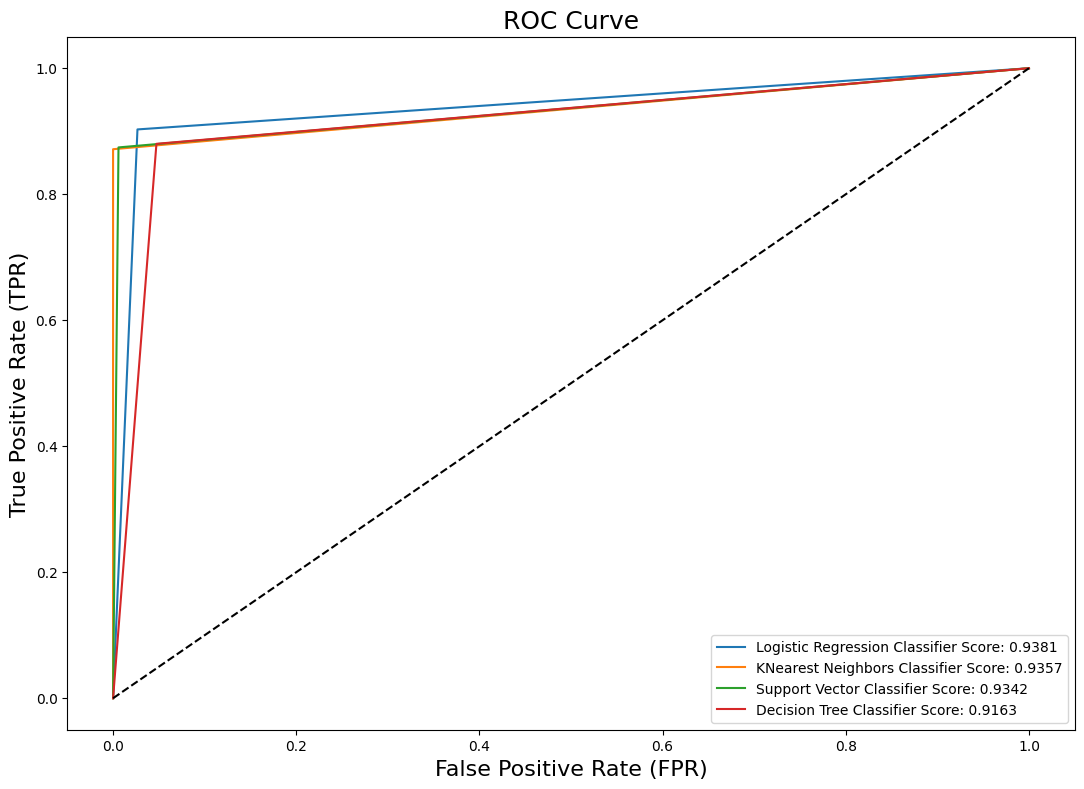

In [19]:
# Compute ROC curve
log_fpr, log_tpr, log_threshold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, dtree_pred)

plt.figure(figsize=(13,9))
plt.title('ROC Curve', fontsize=18)
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression Classifier Score: {log_reg_score:.4f}')
plt.plot(knear_fpr, knear_tpr, label=f'KNearest Neighbors Classifier Score: {knears_score:.4f}')
plt.plot(svc_fpr, svc_tpr, label=f'Support Vector Classifier Score: {svc_score:.4f}')
plt.plot(tree_fpr, tree_tpr, label=f'Decision Tree Classifier Score: {dtree_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.legend(loc='lower right')
plt.show()

The AUC-ROC curves in the graph shown above indicate a very high performance for all four classifiers, with the AUC scores being above 0.92 for all. This high level of performance suggests that the classifiers do an excellent job distinguishing between the fraudulent and non-fraudulent transactions. Logistic Regression has the best Receiving Operating Characteristic score (ROC), meaning that LogisticRegression pretty accurately separates fraud and non-fraud transactions.

<b>Significance of AUC-ROC Scores:</b>
An AUC score of 0.5 is no better than random guessing (represented by the dashed line), so the higher the AUC score above 0.5, the better the model is at distinguishing between the two classes. Scores close to 1 indicate very good classifier performance.

<b>Potential Indication of Overfitting:</b>
Since these curves represent high performance on the training data, this could signal a possibility that the models overfit the training data. If we observe a significant drop in performance when applying the model to a validation or test set (which the model hasn't seen before), then it might indicate overfitting. Overfitting occurs when a model is too closely tailored to the training data, capturing noise as if it were a genuine pattern, which doesn't generalize well to unseen data. In practical terms, if these models start flagging a high number of legitimate transactions as fraudulent (high false positives), or missing actual frauds (low true positives), then despite the high AUC scores on the training data, it would suggest a problem with the model's generalizability.

In [20]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

log_reg_y_pred = log_reg.predict(X_train)
knn_y_pred = knears_neighbors.predict(X_train)
svc_y_pred = svc.predict(X_train)
dtree_y_pred = tree_clf.predict(X_train)

# Overfitting Case
print("Logistic Regression:\n--------------------")
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, log_reg_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, log_reg_y_pred)))
print('Recall Score: {:.2f}'.format(recall_score(y_train, log_reg_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, log_reg_y_pred)))

print("\n\nK-Nearest Neighbors:\n--------------------")
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, knn_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, knn_y_pred)))
print('Recall Score: {:.2f}'.format(recall_score(y_train, knn_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, knn_y_pred)))

print("\n\nSupport Vector Machines:\n------------------------")
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, svc_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, svc_y_pred)))
print('Recall Score: {:.2f}'.format(recall_score(y_train, svc_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, svc_y_pred)))

print("\n\nDecision Tree:\n--------------")
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, dtree_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, dtree_y_pred)))
print('Recall Score: {:.2f}'.format(recall_score(y_train, dtree_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, dtree_y_pred)))

Logistic Regression:
--------------------
Accuracy Score: 0.95
Precision Score: 0.98
Recall Score: 0.91
F1 Score: 0.95


K-Nearest Neighbors:
--------------------
Accuracy Score: 0.94
Precision Score: 1.00
Recall Score: 0.88
F1 Score: 0.93


Support Vector Machines:
------------------------
Accuracy Score: 0.94
Precision Score: 1.00
Recall Score: 0.88
F1 Score: 0.94


Decision Tree:
--------------
Accuracy Score: 0.94
Precision Score: 0.99
Recall Score: 0.89
F1 Score: 0.94


In [21]:
from sklearn.metrics import average_precision_score

log_reg_decision_scores = log_reg.decision_function(original_Xtest)
lr_avg_precision = average_precision_score(original_ytest, log_reg_decision_scores)
print(f"Logistic Regression Average precision-recall score: {lr_avg_precision}")

knears_decision_scores = knears_neighbors.predict_proba(original_Xtest)[:, 1]
knears_avg_precision = average_precision_score(original_ytest, knears_decision_scores)
print(f"KNN Average precision-recall score: {knears_avg_precision}")

svc_decision_scores = svc.decision_function(original_Xtest)
svc_avg_precision = average_precision_score(original_ytest, svc_decision_scores)
print(f"SVM Average precision-recall score: {svc_avg_precision}")

dtree_decision_scores = tree_clf.predict_proba(original_Xtest)[:, 1]
dtree_avg_precision = average_precision_score(original_ytest, dtree_decision_scores)
print(f"Decision Tree Average precision-recall score: {dtree_avg_precision}")

Logistic Regression Average precision-recall score: 0.6840728697609278
KNN Average precision-recall score: 0.6061072503449343
SVM Average precision-recall score: 0.7126207033173437
Decision Tree Average precision-recall score: 0.07597868251457698


### Summary

When evaluating a classifier, high performance on the training data may initially seem desirable. However, if the classifier performs significantly worse on unseen data, this indicates overfitting. Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts the performance of the model on new data, meaning it has learned the training data "too well."

The output provided suggests that all classifiers are performing extremely well on the training data with high accuracy, precision, recall, and F1 scores. Recall measures the ability of a classifier to find all the positive samples; precision tells us the proportion of positive identifications that were actually correct, and the F1 score provides a balance between precision and recall. Accuracy measures the proportion of true results among the total number of cases examined.

Given that all scores are high, it can imply that the model may have captured the noise in the data as signal. This is particularly true in datasets where the signal (real patterns) and noise (randomness) can be difficult to distinguish. For instance, a decision tree that is not pruned will likely overfit the data, as it will grow complex enough to perfectly classify all of the training data, including the noise, leading to poor generalization to new data. Also, the average precision-recall score is an aggregate measure of precision and recall across all thresholds, and it is particularly useful in the context of imbalanced datasets. The precision-recall scores for all 4 major classifers for the undersampled data indicates a very low to average performance, likely due to the model not effectively capturing the minority class characteristics.

In this problem of credit card fraud detection, where the classes are often heavily imbalanced as mentioned previously, models can also appear to perform very well if they simply predict the majority class for all inputs. This is where a high accuracy score can be misleading, and it's important to look at other metrics like precision and recall. Nevertheless, if these metrics are also high on the training data but not on the validation/test data, this further suggests overfitting.

Considering the above outcomes, we could try oversampling using methods like Synthetic Minority Over-sampling Technique (SMOTE) in the next section to see if the average precision-recall score and performance of the classifiers increase.

## 8. Synthetic Minority Over-sampling Technique (SMOTE) Oversampling

SMOTE, which stands for Synthetic Minority Oversampling Technique, is a popular oversampling method used to address class imbalance in machine learning. The main idea behind the SMOTE algorithm is to generate synthetic data points of the minority class by interpolating between the minority class instances. In other words, SMOTE creates new data artificially. To achieve this, SMOTE randomly selects a minority class instance and then finds its k nearest minority class neighbors. It then generates new synthetic instances by interpolating between the original minority instance and its k nearest neighbors.

For the oversampling technique, since we are training/validating/testing on the original train/test dataset which is significantly larger compared to the undersampled dataset, we'll use RandomizedSearchCV hyperparameter tuning method. RandomizedSearch is faster than GridSearch and should always be used when we have a large parameter space. Also for the purposes of the oversampling technique, we'll only use logistic regression here because other classifier methods such as KNN, SVC, and Decision Trees take a longer time to process on oversampled data due to the complex natures of the algorithms. KNN, SVC, and Decision Trees generally have more complex algorithms compared to Logistic Regression. For example, KNN requires computing distances between data points, SVC involves solving a quadratic optimization problem, and Decision Trees require recursive splitting of data based on feature values. These operations can be computationally intensive, especially when dealing with large datasets. Also, since the dataset is highly imbalanced, algorithms like KNN, SVC, and Decision Trees require more iterations to effectively learn from the oversampled data.

Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated in this technique. Let's see SMOTE in action!

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time

smote_log_reg = LogisticRegression()
smote_log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Function to perform tuning and evaluation
def perform_tuning(X_train, y_train, X_test, y_test, classifier, params):
    search_obj = RandomizedSearchCV(classifier, params, n_iter=3)
    best_est = 0

    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), search_obj)
    scores = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}

    for train_index, test_index in sss.split(X_train, y_train):
        model = pipeline.fit(X_train[train_index], y_train[train_index])
        best_est = search_obj.best_estimator_
        prediction = best_est.predict(X_train[test_index])

        scores['accuracy'].append(accuracy_score(y_train[test_index], prediction))
        scores['precision'].append(precision_score(y_train[test_index], prediction))
        scores['recall'].append(recall_score(y_train[test_index], prediction))
        scores['f1'].append(f1_score(y_train[test_index], prediction))
        scores['auc'].append(roc_auc_score(y_train[test_index], prediction))

    smote_prediction = best_est.predict(X_test)
    print(f"Classification report for {classifier.__class__.__name__}:")
    print(classification_report(y_test, smote_prediction, target_names=['No Fraud', 'Fraud']))

    print(f"Scores for {classifier.__class__.__name__}:")
    for score_name, score_values in scores.items():
        print(f"{score_name.capitalize()}: {np.mean(score_values):.2f}")

    y_score = best_est.decision_function(X_test)
    average_precision = average_precision_score(y_test, y_score)
    print('\nAverage precision-recall score: {0:0.2f}'.format(average_precision))

    return best_est

start_time = time.time()
print("\nLogistic Regression - RandomizedSearchCV\n")
best_est = perform_tuning(original_Xtrain, original_ytrain, original_Xtest, original_ytest, smote_log_reg, smote_log_reg_params)
end_time = time.time()
execution_time = end_time - start_time
print("\nExecution time:", execution_time, "seconds\n")


Logistic Regression - RandomizedSearchCV

Classification report for LogisticRegression:
              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56864
       Fraud       0.06      0.91      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Scores for LogisticRegression:
Accuracy: 0.98
Precision: 0.06
Recall: 0.90
F1: 0.11
Auc: 0.94

Average precision-recall score: 0.78

Execution time: 111.35465168952942 seconds



### Summary

After setting up the oversampling and the classifier with its corresponding hyperparameters, I performed hyperparameter tuning using RandomizedSearchCV. I integrated SMOTE into a pipeline that ensures the cross-validation process accounts for the synthetic sampling. By evaluating across several metrics—accuracy, precision, recall, F1 score, and area under the ROC curve—I was able to obtain a multi-faceted view of the model's performance.

The results of this approach demonstrated the typical precision/recall trade-off. While the model achieved a high recall, indicating it was adept at identifying most fraud cases, the precision was relatively low, reflecting a higher number of false positives. This trade-off is significant in fraud detection because it emphasizes the model's ability to capture as many fraud cases as possible, even at the expense of flagging some legitimate transactions for review. The average precision-recall score provided a single measure of this trade-off, capturing the balance between recall and the ability to detect positive instances without raising too many false alarms.

## 9. Testing on Undersampled Data

In this section, we will test on the undersampled data for all 4 major classifers and provide a classification report consisting of precision, recall, and F1 scores. We test on the undersampled data here we can had previously tested on oversampled data using the SMOTE technique for Logistic Regression in the previous section.

Random UnderSampling: We will evaluate the final performance of the classification models in the random undersampling subset. Keep in mind that this is not the data from the original dataframe.

Classification Models: The models that performed the best were logistic regression and support vector classifier (SVM), with KNN being a close runner-up.

In [23]:
# SMOTE after fitting and cross-validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_sm_train, y_sm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [24]:
log_reg_smote = best_models_grid['LogisticRegression']
log_reg_smote.fit(X_sm_train, y_sm_train)

knn_smote = best_models_grid['KNearest']
svc_smote = best_models_grid['Support Vector Classifier']
dtree_smote = best_models_grid['DecisionTreeClassifier']

y_pred_log_reg = log_reg_smote.predict(X_test_undersample.values)
y_pred_knn = knn_smote.predict(X_test_undersample.values)
y_pred_svc = svc_smote.predict(X_test_undersample.values)
y_pred_dtree = dtree_smote.predict(X_test_undersample.values)

print("Logistic Regression:\n--------------------")
print(classification_report(y_test_undersample, y_pred_log_reg))

print("K-Nearest Neighbors:\n--------------------")
print(classification_report(y_test_undersample, y_pred_knn))

print("Support Vector Machine:\n-----------------------")
print(classification_report(y_test_undersample, y_pred_svc))

print("Decision Tree:\n--------------")
print(classification_report(y_test_undersample, y_pred_dtree))

Logistic Regression:
--------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       154
           1       0.96      0.93      0.94       142

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

K-Nearest Neighbors:
--------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       154
           1       0.99      0.89      0.94       142

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296

Support Vector Machine:
-----------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       154
           1       0.98      0.89      0.93       142

    accuracy                           0.94       

### Summary

In this study, I evaluated the performance of the best models derived from GridSearchCV—Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Decision Tree—using the undersampled dataset for testing. By testing on undersampled data, I sought to determine how well these models would perform in a scenario where the class distribution is balanced, contrary to their training on the original imbalanced dataset. My intent was to compare the effectiveness of the models that had previously shown promise in detecting fraudulent transactions after being trained with SMOTE on oversampled data.

The classification reports provided a detailed breakdown of precision, recall, and F1 scores for each classifier, offering a comprehensive view of their performance. The significance of these results lies in their ability to reveal how each model manages the balance between false positives and false negatives—crucial in fraud detection where the cost of a false negative can be very high. Precision reflects the accuracy of the positive predictions (fraud), and recall shows the ability to find all the positive instances (all fraud cases). The F1 score combines these two aspects to provide a single score that balances both precision and recall.

The overall results indicated a strong performance across all models with regard to the harmonized accuracy, precision, recall, and F1 scores on the undersampled test set. This consistency suggests that my chosen classifiers, after hyperparameter optimization, are potentially robust tools for fraud detection in a balanced class setting. Thus, the chosen models, especially Logistic Regression, performs well on the undersampled data.

## 10. Focal Loss on Oversampled Data

Synthetic Minority Over-sampling Technique (SMOTE) generates synthetic instances for the minority class to balance the class distribution. Focal Loss can be beneficial in SMOTE oversampled datasets by focusing on misclassifications and difficult examples, even among the synthetic instances generated by SMOTE. This ensures that the model learns to discriminate effectively between the classes, including both original and synthetic instances. SMOTE can potentially introduce noise or outliers in the synthetic samples, which might impact the model's performance. Focal Loss can help in mitigating the influence of these noisy samples by down-weighting their contribution to the overall loss, thus improving the robustness of the model.

In [ ]:
def focal_loss(gamma=2., alpha=4.):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        fl = - tf.math.log(p_t) * tf.pow((1 - p_t), gamma) * alpha_t
        return tf.reduce_mean(fl)
    return focal_loss_fixed

# Build a simple neural network model
# Parameters for the model
n_inputs = X_sm_train.shape[1]

# Define the model
model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#model.compile(optimizer=Adam(lr=0.001), loss=focal_loss(alpha=0.25, gamma=2), metrics=['accuracy'])
#model.compile(optimizer=Adam(learning_rate=0.001), loss=focal_loss(gamma=2, alpha=0.25), metrics=['accuracy'])
model.compile(optimizer='adam', loss=focal_loss(gamma=2, alpha=0.25), metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,955 (7.64 KB)

 Trainable params: 1,955 (7.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_sm_train, y_sm_train, epochs=25, batch_size=32, shuffle=True, validation_data=(original_Xtest, original_ytest)) #, batch_size=32)

Epoch 1/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9707 - loss: 0.0078 - val_accuracy: 0.9981 - val_loss: 0.0015
Epoch 2/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9981 - loss: 9.6043e-04 - val_accuracy: 0.9983 - val_loss: 0.0014
Epoch 3/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9989 - loss: 6.5238e-04 - val_accuracy: 0.9983 - val_loss: 0.0016
Epoch 4/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9990 - loss: 6.0706e-04 - val_accuracy: 0.9991 - val_loss: 9.0345e-04
Epoch 5/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9992 - loss: 4.3031e-04 - val_accuracy: 0.9992 - val_loss: 0.0011
Epoch 6/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9993 - loss: 4.1527e-04 - val_accuracy: 0.9990 - val_loss: 0.0012
Epoch 7/25
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9995 - loss: 3.3273e-04 - val_accuracy: 0.9991 - val_loss: 0.0011
Epoch 8/25
14216/14216 ━━━━━━━━━━━━━━━━━━

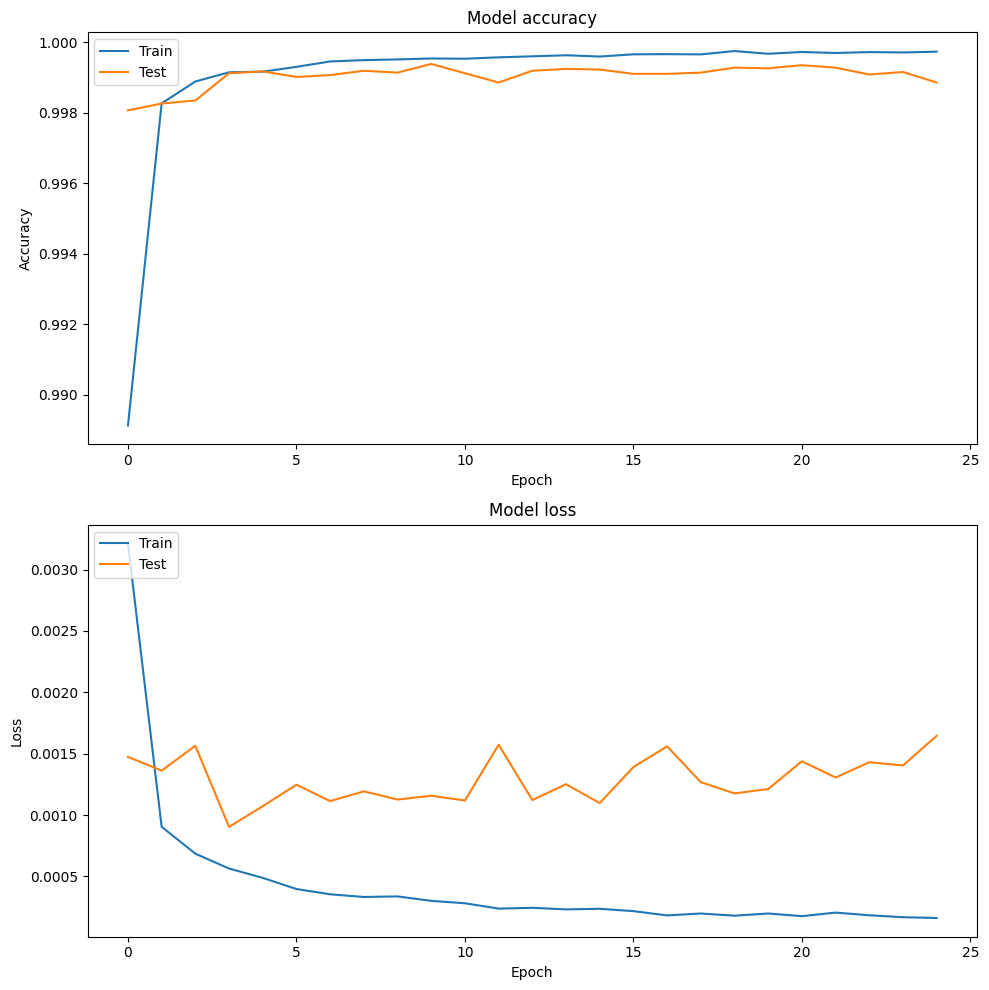

In [ ]:
# Plotting the accuracy and loss curves
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the original test data
predictions = model.predict(original_Xtest, batch_size=200, verbose=1)

285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Convert probabilities to class labels and flatten them (convert a multi-dimensional array into a 1D array)
oversample_fraud_predictions = (predictions > 0.5).astype(int)
oversample_fraud_predictions = oversample_fraud_predictions.flatten()
oversample_fraud_predictions[:1000]

56962


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Summary

Here, we implemented a neural network model with focal loss on oversampled data. In the provided accuracy graph, we observe that the model achieves an extremely high training accuracy, starting higher than 90% and reaching almost 100% accuracy as training progresses. Such high figures might initially seem impressive. However, they could also indicate that the model is learning to fit not only the genuine patterns but also the noise inherent in the synthetically oversampled data. This is a known risk when using techniques like SMOTE for oversampling. The test accuracy, representing the model's performance on unseen data, remains remarkably stable around 99%, which is encouraging as it suggests the model retains a high degree of generalization when presented with new data.

The loss graph complements this view, showing a training loss that decreases sharply in the initial epochs and then levels off, maintaining very low values throughout the remainder of the training process. The validation loss, despite being higher than the training loss, demonstrates low variability, oscillating within a narrow range, which could indicate that the model is stable and not significantly affected by overfitting to the training data. The graphs reveal an interesting picture of the model's learning dynamics. The small gap between training and validation accuracy, along with the consistent loss trends, suggests that the model has learned the patterns well and generalizes them effectively to unseen data. Nevertheless, the high training accuracy and low loss should be interpreted with caution due to the potential influence of the oversampled data on the training process. The final array of predictions shows a very high number of zeros, suggesting that the model predicts the majority class well, with sporadic ones indicating the detection of fraudulent transactions.

## 11. Conclusion

In conclusion, our chosen models have performed well on both the training and testing datasets using both undersampled and oversampled data albeit with a few tradeoffs that came along the way. Finally's lets evaluate the performance of Random Undersampling and Oversampling using SMOTE by comparing their accuracies, although accuracy alone was not our sole metric of model evaluation in this project.

In [ ]:
# Logistic Regression accuracy score using undersampling technique
y_pred_undersample = log_reg.predict(X_test_undersample.values)
undersample_accuracy_score = accuracy_score(y_test_undersample, y_pred_undersample)

# Logistic Regression accuracy score using SMOTE oversampling technique
y_pred_sm = best_est.predict(original_Xtest)
smote_accuracy_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_accuracy_score, smote_accuracy_score]}
final_df = pd.DataFrame(data=d)
final_df

,Technique,Score
0,Random UnderSampling,0.935811
1,Oversampling (SMOTE),0.973070


Lastly, we can write our train, validation, and test datasets used for random undersampling and SMOTE oversampling to their respective CSV files to allow for model reproducibility by others.

In [36]:
import sys
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
from google.colab import files

X_train_undersample_final, X_val_undersample, y_train_undersample_final, y_val_undersample = train_test_split(
    X_train_undersample, y_train_undersample, test_size=0.2, random_state=42
)

# Splitting the SMOTE training data to create a validation set
X_sm_train_final, X_sm_val, y_sm_train_final, y_sm_val = train_test_split(
    X_sm_train, y_sm_train, test_size=0.2, random_state=42
)

# Writing Random Under-sampling datasets to CSV files
X_train_undersample_final.to_csv('undersample_train_dataset.csv', index=False)
X_val_undersample.to_csv('undersample_validation_dataset.csv', index=False)
X_test_undersample.to_csv('undersample_test_dataset.csv', index=False)

# Also need to save the corresponding y (target) data for each dataset
y_train_undersample_final.to_csv('undersample_train_target.csv', index=False)
y_val_undersample.to_csv('undersample_validation_target.csv', index=False)
y_test_undersample.to_csv('undersample_test_target.csv', index=False)



# Convert NumPy arrays to pandas DataFrame for writing to CSV
X_sm_train_final_df = pd.DataFrame(X_sm_train_final, columns=X.columns)
X_sm_val_df = pd.DataFrame(X_sm_val, columns=X.columns)
X_test_df = pd.DataFrame(original_Xtest, columns=X.columns)

y_sm_train_final_df = pd.DataFrame(y_sm_train_final, columns=['Class'])
y_sm_val_df = pd.DataFrame(y_sm_val, columns=['Class'])
y_test_df = pd.DataFrame(original_ytest, columns=['Class'])

# Writing SMOTE Over-sampling datasets to CSV files
X_sm_train_final_df.to_csv('oversample_train_dataset.csv', index=False)
X_sm_val_df.to_csv('oversample_validation_dataset.csv', index=False)
X_test_df.to_csv('oversample_test_dataset.csv', index=False)

# Also need to save the corresponding y (target) data for each dataset
y_sm_train_final_df.to_csv('oversample_train_target.csv', index=False)
y_sm_val_df.to_csv('oversample_validation_target.csv', index=False)
y_test_df.to_csv('oversample_test_target.csv', index=False)

!cp undersample_train_dataset.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"
!cp undersample_validation_dataset.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"
!cp undersample_test_dataset.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"
!cp undersample_train_target.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"
!cp undersample_validation_target.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"
!cp undersample_test_target.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"

!cp oversample_train_dataset.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"
!cp oversample_validation_dataset.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"
!cp oversample_test_dataset.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"
!cp oversample_train_target.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"
!cp oversample_validation_target.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"
!cp oversample_test_target.csv "/content/drive/My Drive/Colab Notebooks/Credit Card Fraud Detector (CCFD)/"

print("Successfully wrote undersampled and oversampled data to CSV files!")

Successfully wrote undersampled and oversampled data to CSV files!


### Summary

In this concluding phase, we diligently compared the accuracy scores of a Logistic Regression model when applied to two different data preparation techniques: random undersampling and oversampling using SMOTE. By creating a summary dataframe to showcase the performance of each technique, we observed that our model generally yields higher accuracy when trained with the SMOTE technique. This underscores the potential effectiveness of oversampling in providing a more representative training dataset, particularly when dealing with imbalanced classes. Our findings suggest that while undersampling can significantly improve the model's ability to detect fraud by creating a balance between classes, oversampling with SMOTE typically enhances the model's accuracy even further by creating synthetic examples and preserving valuable information that might be lost through undersampling. This comparison is crucial for informing our approach to fraud detection, guiding us toward methodologies that maximize model performance and reliability.

Nevertheless, the neural network on the oversampled dataset predicts less fraudulent transactions compared to randomly undersampled dataset because outliers weren't removed. Because of the missing outlier removal process, there were some inaccurate misclassifications resulting in not accurately identifying a few non-fraudulent transactions, which could be a huge disadvantage for financial institutions.

In our comprehensive analysis of financial fraud detection, we applied various machine learning models to both undersampled and oversampled datasets to combat the challenge posed by imbalanced classes. Our approach included meticulous preprocessing, strategic resampling, and rigorous model evaluation. When testing on the undersampled data, we noted that our models—Logistic Regression, K-Nearest Neighbors, Support Vector Machine, and Decision Tree—demonstrated commendable precision, recall, and F1 scores, which signified their capacity to discern fraudulent transactions in a balanced class environment effectively. On the other hand, our exploration of SMOTE with Logistic Regression on oversampled data revealed a high recall, indicating a strong ability to detect fraudulent activities, albeit with the expected trade-off in precision due to the model's inclination to ensure fewer false negatives. The execution time and the computational efficiency of Logistic Regression made it a suitable choice for handling the enlarged dataset produced by SMOTE. Collectively, our efforts showcased the potential of these methodologies in developing robust fraud detection systems that can adapt to different data representations, ultimately enhancing the reliability and efficiency of identifying fraudulent transactions in real-world scenarios.